In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


 # Results for paired T-test

In [2]:
# Image models
list_rf_img =[0.5125598086124401, 0.5645933014354068, 0.6232057416267942, 0.5040726817042607, 0.5714285714285714, 0.5952380952380952, 0.6257575757575757, 0.5681818181818181, 0.5575757575757576, 0.5709090909090909]
list_bL_img = [0.8026315789473685,0.8797846889952153,0.7174043062200958,0.7866541353383458,0.8515037593984962,0.8308270676691729,0.7227272727272727,0.7012121212121212,0.8654545454545455,0.7678787878787878]
list_lstm_img =   [0.828349232673645, 0.7625597715377808, 0.7670454978942871, 0.7540726661682129, 0.8179824352264404, 0.5, 0.7409090995788574, 0.6924241781234741, 0.6990909576416016, 0.6899999976158142]
list_lstm_shallow_img =[0.7996411323547363, 0.7637559771537781, 0.7505980730056763, 0.7559523582458496, 0.8320802450180054, 0.768796980381012, 0.781818151473999, 0.6754544973373413, 0.6990908980369568, 0.6903030276298523]

# Clinical models 
list_rf_cli =[0.7291666666666666, 0.7953869047619047, 0.7222222222222222, 0.714699074074074, 0.670138888888889, 0.730324074074074, 0.6270676691729322, 0.6575187969924812, 0.7593984962406015, 0.6994360902255639]
baseline_lstm_clean =[0.8645833134651184, 0.8671875, 0.7841435074806213, 0.7683255672454834, 0.6844136118888855, 0.8084490895271301, 0.8189849257469177, 0.8328948020935059, 0.8505640029907227, 0.6936090588569641]
list_bL_cli =[0.9290322580645161, 0.8828781512605042, 0.8181460084033614, 0.8161764705882353, 0.7678571428571429, 0.9088760504201681, 0.7647058823529411, 0.8791000271076173, 0.8818107888316618, 0.7782596909731634]
list_lstm_cli=[0.9066219925880432, 0.9043899178504944, 0.8063271641731262, 0.7891589403152466, 0.7523147463798523, 0.8925540447235107, 0.8093985915184021, 0.8616541624069214, 0.8610902428627014, 0.7486842274665833]
list_lstm_shallow_cli=[0.9161086082458496, 0.9086681008338928, 0.8200231790542603, 0.7615740299224854, 0.7571372985839844, 0.8858024477958679, 0.8146616816520691, 0.8725563883781433, 0.8725563287734985, 0.7697369456291199]

# mult visits
list_lr_mult_visits = [0.9277864992150706, 0.9340498290180753, 0.9564625850340136, 0.8122448979591836, 0.7925824175824175, 0.7832558139534884, 0.7738636363636363, 0.8313186813186814, 0.7949604743083005, 0.7936507936507936]
list_lstm_mult_visits =[0.9370300769805908, 0.8627820014953613, 0.9370300769805908, 0.9345930218696594, 0.8696202635765076, 0.8873812556266785, 0.724494993686676, 0.7981203198432922, 0.8935574293136597, 0.8036035299301147]


# combined models
list_lr_combi = [0.7392607392607393, 0.8966233766233765, 0.923116883116883, 0.9080519480519481, 0.8384415584415583, 0.9033766233766234, 0.828051948051948, 0.8729757085020242, 0.8284412955465587, 0.6366396761133604]
list_lstm_combi = [0.8164335489273071, 0.8007792234420776, 0.8935065269470215, 0.8594805002212524, 0.8527272939682007, 0.9200000166893005, 0.8379220962524414, 0.8481781482696533, 0.8719635605812073, 0.7135627269744873]
# ensample
list_ensample =  [0.9230769230769231, 0.8145454545454545, 0.9044155844155845, 0.8161038961038961, 0.8571428571428571, 0.8005194805194805, 0.8961038961038961, 0.9048582995951417, 0.854757085020243, 0.6396761133603239]

# Make paired t-test

In [3]:
def pstat(list1,list2):
    #p-value> 0.05 Så kan vi ikke afvise at resultaterne er det samme
    print(stats.ttest_rel(list1, list2))

    if stats.ttest_rel(list1, list2)[1] > 0.05: 
        print("De er ens")

    if stats.ttest_rel(list1, list2)[1] <= 0.05:
        print("De er forskellige")

In [4]:
pstat(list_lr_combi,list_lstm_combi)

Ttest_relResult(statistic=-0.2275330257268754, pvalue=0.8250940589710434)
De er ens


# DELONG

### Code from https://worc.readthedocs.io/en/latest/_modules/WORC/statistics/delong.html

In [5]:
import pandas as pd
import numpy as np
import scipy.stats

# AUC comparison adapted from
# https://github.com/Netflix/vmaf/
def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2


def fastDeLong(predictions_sorted_transposed, label_1_count):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Operating Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m])
    ty = np.empty([k, n])
    tz = np.empty([k, m + n])
    for r in range(k):
        tx[r, :] = compute_midrank(positive_examples[r, :])
        ty[r, :] = compute_midrank(negative_examples[r, :])
        tz[r, :] = compute_midrank(predictions_sorted_transposed[r, :])
    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def calc_pvalue(aucs, sigma):
    """Computes log(10) of p-values.
    Args:
       aucs: 1D array of AUCs
       sigma: AUC DeLong covariances
    Returns:
       log10(pvalue)
    """
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    return np.log10(2) + scipy.stats.norm.logsf(z, loc=0, scale=1) / np.log(10)


def compute_ground_truth_statistics(ground_truth):
    assert np.array_equal(np.unique(ground_truth), [0, 1])
    order = (-ground_truth).argsort()
    label_1_count = int(ground_truth.sum())
    return order, label_1_count


def delong_roc_variance(ground_truth, predictions):
    """
    Computes ROC AUC variance for a single set of predictions
    Args:
       ground_truth: np.array of 0 and 1
       predictions: np.array of floats of the probability of being class 1
    """
    order, label_1_count = compute_ground_truth_statistics(ground_truth)
    predictions_sorted_transposed = predictions[np.newaxis, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count)
    assert len(aucs) == 1, "There is a bug in the code, please forward this to the developers"
    return aucs[0], delongcov


def delong_roc_test(ground_truth, predictions_one, predictions_two):
    """
    Computes log(p-value) for hypothesis that two ROC AUCs are different
    Args:
       ground_truth: np.array of 0 and 1
       predictions_one: predictions of the first model,
          np.array of floats of the probability of being class 1
       predictions_two: predictions of the second model,
          np.array of floats of the probability of being class 1
    """
    order, label_1_count = compute_ground_truth_statistics(ground_truth)
    predictions_sorted_transposed = np.vstack((predictions_one, predictions_two))[:, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count)
    return calc_pvalue(aucs, delongcov)

def zero_oner(numbers=None):
    numbers[numbers>1]=1
    numbers[numbers<0]=0
    
    return numbers

### Get the data

In [35]:
# Clinical val
RF_cli_3v = np.genfromtxt("C:/Users/python_test/Desktop/Speciale/RF_cli_3v.csv")
RF_cli_5v_3v = np.genfromtxt("C:/Users/python_test/Desktop/Speciale/RF_cli_5v_3v.csv") # tree visits labels samples from 5v
RF_cli_5v = np.genfromtxt("C:/Users/python_test/Desktop/Speciale/RF_cli_5v.csv")

y_cli_3v = np.genfromtxt("C:/Users/python_test/Desktop/Speciale/y_cli_3v.csv")
y_cli_5v_3v = np.genfromtxt("C:/Users/python_test/Desktop/Speciale/y_cli_5v_3v.csv")

LinR_cli_3v = np.genfromtxt("C:/Users/python_test/Desktop/Speciale/LinR_cli_3v.csv")
LinR_cli_5v = np.genfromtxt("C:/Users/python_test/Desktop/Speciale/LinR_cli_5v.csv")
LinR_cli_5v_3v = np.genfromtxt("C:/Users/python_test/Desktop/Speciale/LinR_cli_5v_3v.csv")

LSTM_cli_3v = np.fromfile("C:/Users/python_test/Desktop/Speciale/LSTM_cli_3v.csv")

LSTM_shallow_cli_3v= np.fromfile("C:/Users/python_test/Desktop/Speciale/LSTM_shallow_cli_3v.csv")
LSTM_shallow_cli_5v= np.fromfile("C:/Users/python_test/Desktop/Speciale/LSTM_shallow_cli_5v.csv")
LSTM_shallow_cli_5v3v =np.fromfile("C:/Users/python_test/Desktop/Speciale/LSTM_shallow_cli_5v3v.csv")
y_lastm_cli_3v= np.fromfile("C:/Users/python_test/Desktop/Speciale/y_lastm_cli_3v.csv")
y_lastm_cli_5v= np.fromfile("C:/Users/python_test/Desktop/Speciale/y_lastm_cli_5v.csv")

# MRI images
RF_mri= np.genfromtxt("C:/Users/python_test/Desktop/Speciale/RF_mri.csv")
y_mri= np.genfromtxt("C:/Users/python_test/Desktop/Speciale/y_mri.csv").astype(int)
MLinR_mri= np.genfromtxt("C:/Users/python_test/Desktop/Speciale/MLinR_mri.csv")
MLog_mri= np.genfromtxt("C:/Users/python_test/Desktop/Speciale/MLogR_mri.csv")
LSTM_mri= np.fromfile("C:/Users/python_test/Desktop/Speciale/LSTM_mri.csv")
#LSTM_mri_y = np.fromfile("C:/Users/python_test/Desktop/Speciale/LSTM_mri_y.csv")

shallow_LSTM_mri = np.fromfile("C:/Users/python_test/Desktop/Speciale/shallow_LSTM_mri.csv")

#combined data
combined_MLinR =np.fromfile("C:/Users/python_test/Desktop/Speciale/combined_MLinR.csv")
combined_LSTM = np.fromfile("C:/Users/python_test/Desktop/Speciale/combined_LSTM.csv")

ensamble = np.fromfile("C:/Users/python_test/Desktop/Speciale/ensamble.csv")
y_ensamble = np.fromfile("C:/Users/python_test/Desktop/Speciale/y_ensamble.csv")

ensamble_comb = np.fromfile("C:/Users/python_test/Desktop/Speciale/ensamble_comb.csv")
y_ensamble_comb = np.fromfile("C:/Users/python_test/Desktop/Speciale/y_ensamble_comb.csv")

In [58]:
predictions_one=LSTM_cli_3v
predictions_two=LSTM_shallow_cli_3v
ground_truth=y_cli_3v.astype(int)

predictions_one.shape, predictions_two.shape, ground_truth.shape

((1232,), (1232,), (1232,))

P-Value:  [[0.02283444]]
De er forskellige


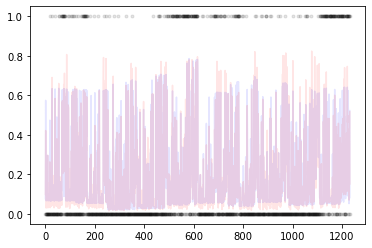

In [59]:
p_delong = 10**(delong_roc_test(ground_truth, zero_oner(predictions_one), zero_oner(predictions_two)))
print("P-Value: ", p_delong)

if p_delong > 0.05: 
        print("De er ens")

if p_delong <= 0.05:
        print("De er forskellige")

plt.plot(range(predictions_one.shape[0]), zero_oner(predictions_one), c="b",alpha=0.1)
plt.plot(range(predictions_one.shape[0]), zero_oner(predictions_two), c="r",alpha=0.1)
plt.scatter(range(predictions_one.shape[0]), ground_truth, c="black", marker=".", alpha=0.1)
plt.show()

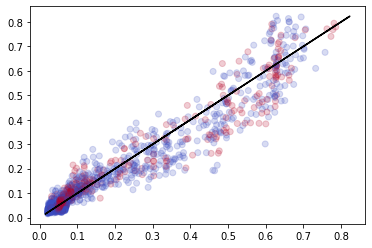

In [61]:
plt.scatter(zero_oner(predictions_one), zero_oner(predictions_two), c=ground_truth,cmap="coolwarm",alpha=0.2)
plt.plot(zero_oner(predictions_two),zero_oner(predictions_two), c="black")
plt.show()

In [ ]:
import sklearn
x_distr = scipy.stats.norm(0.5, 1)
y_distr = scipy.stats.norm(-0.5, 1)
sample_size_x = 7
sample_size_y = 14
n_trials = 1000
aucs = np.empty(n_trials)
variances = np.empty(n_trials)
np.random.seed(1234235)
labels = np.concatenate([np.ones(sample_size_x), np.zeros(sample_size_y)])
for trial in range(n_trials):
    scores = np.concatenate([
        x_distr.rvs(sample_size_x),
        y_distr.rvs(sample_size_y)])
    aucs[trial] = sklearn.metrics.roc_auc_score(labels, scores)
    auc_delong, variances[trial] = delong_roc_variance(labels, scores)

print(f"Experimental variance {variances.mean():.4f}, "
      f"computed vairance {aucs.var():.4f}, {n_trials} trials")